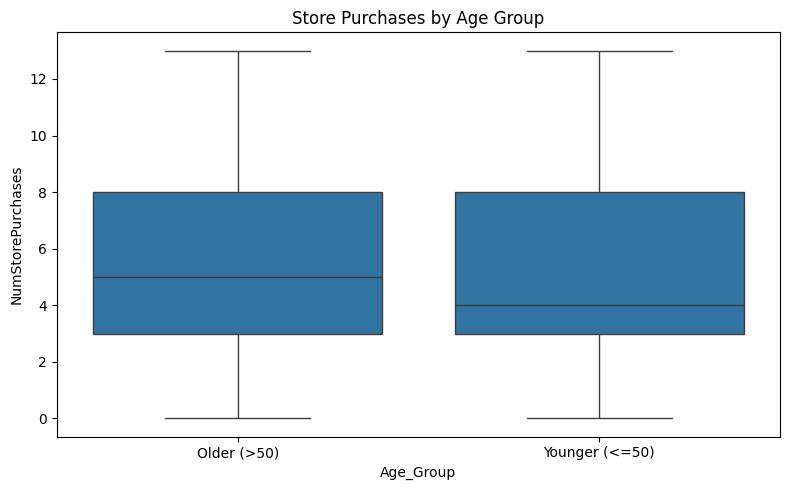

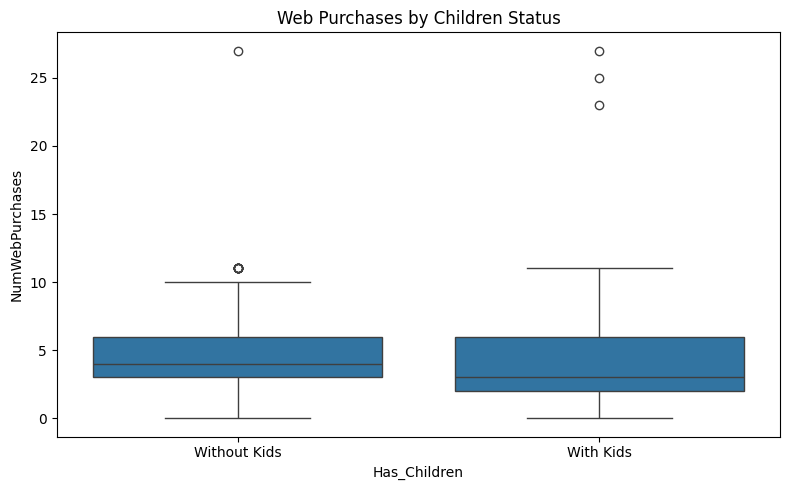

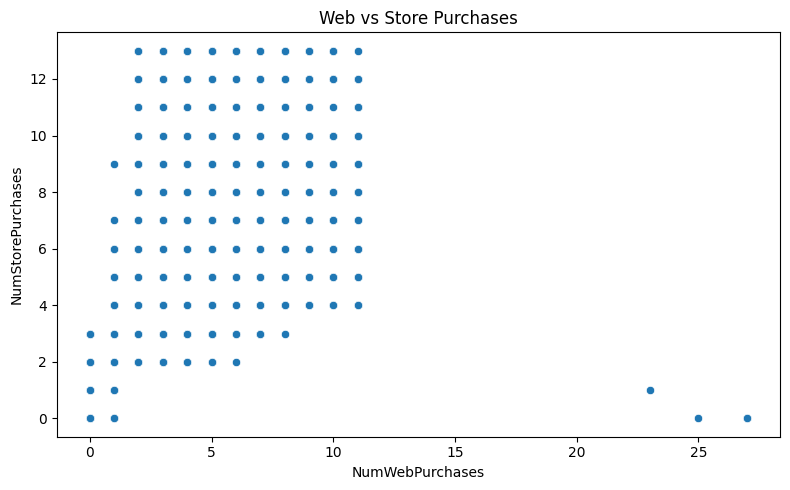

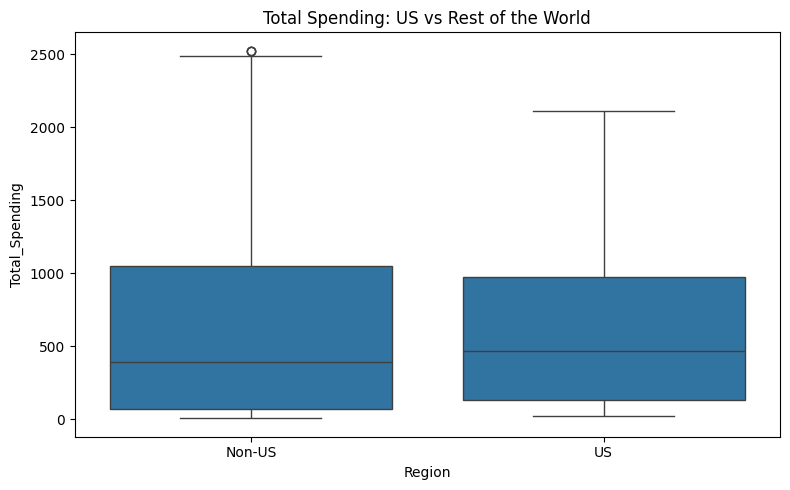

1. Older vs Younger (Store Purchases): p-value = 0.0000
2. With vs Without Kids (Web Purchases): p-value = 0.0009
3. Correlation (Web vs Store Purchases): r = 0.5027
4. US vs Rest (Total Spending): p-value = 0.7630


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the engineered dataset
df = pd.read_csv('../data/engineered_data.csv')

# Create a report text
report = []

# a. Do older people prefer store purchases?
older = df[df['Age'] > 50]['NumStorePurchases']
younger = df[df['Age'] <= 50]['NumStorePurchases']
t_stat1, p_val1 = ttest_ind(older, younger, nan_policy='omit')
report.append(f"1. Older vs Younger (Store Purchases): p-value = {p_val1:.4f}")

# Visualize: Store Purchases by Age Group
df['Age_Group'] = ['Older (>50)' if age > 50 else 'Younger (<=50)' for age in df['Age']]
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age_Group', y='NumStorePurchases', data=df)
plt.title("Store Purchases by Age Group")
plt.tight_layout()
plt.savefig('../output/plots/store_purchases_by_age_group.png')
plt.show()

# b. Do people with kids prefer online purchases?
with_kids = df[df['Total_Children'] > 0]['NumWebPurchases']
without_kids = df[df['Total_Children'] == 0]['NumWebPurchases']
t_stat2, p_val2 = ttest_ind(with_kids, without_kids, nan_policy='omit')
report.append(f"2. With vs Without Kids (Web Purchases): p-value = {p_val2:.4f}")

# Visualize: Web Purchases by Children
df['Has_Children'] = ['With Kids' if k > 0 else 'Without Kids' for k in df['Total_Children']]
plt.figure(figsize=(8, 5))
sns.boxplot(x='Has_Children', y='NumWebPurchases', data=df)
plt.title("Web Purchases by Children Status")
plt.tight_layout()
plt.savefig('../output/plots/web_purchases_by_children.png')
plt.show()

# c. Correlation between store and web purchases (possible cannibalization)
correlation = df[['NumWebPurchases', 'NumStorePurchases']].corr().iloc[0, 1]
report.append(f"3. Correlation (Web vs Store Purchases): r = {correlation:.4f}")

# Visualize: Scatter Plot for Web vs Store Purchases
plt.figure(figsize=(8, 5))
sns.scatterplot(x='NumWebPurchases', y='NumStorePurchases', data=df)
plt.title("Web vs Store Purchases")
plt.tight_layout()
plt.savefig('../output/plots/web_vs_store_scatter.png')
plt.show()

# d. Spending difference between US and rest of the world
if 'Country_US' in df.columns:
    us = df[df['Country_US'] == 1]['Total_Spending']
    non_us = df[df['Country_US'] == 0]['Total_Spending']
    t_stat3, p_val3 = ttest_ind(us, non_us, nan_policy='omit')
    report.append(f"4. US vs Rest (Total Spending): p-value = {p_val3:.4f}")

    # Visualize: Spending by Region
    df['Region'] = ['US' if c == 1 else 'Non-US' for c in df['Country_US']]
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Region', y='Total_Spending', data=df)
    plt.title("Total Spending: US vs Rest of the World")
    plt.tight_layout()
    plt.savefig('../output/plots/spending_us_vs_rest.png')
    plt.show()
else:
    report.append("4. Country_US column not found.")

# Save summary statistics
summary = df.describe()
summary.to_csv('../output/reports/summary_statistics.csv')

# Save the hypothesis test results
with open('../output/reports/hypothesis_results.txt', 'w') as f:
    f.write("HYPOTHESIS TEST RESULTS\n")
    f.write("------------------------\n")
    for line in report:
        f.write(line + "\n")

# Print results
for line in report:
    print(line)
